## References
* [Kaggle, Coronavirus (COVID-19) Visualization & Prediction](https://www.kaggle.com/code/therealcyberlord/coronavirus-covid-19-visualization-prediction/notebook#US-Medical-Data-on-Testing)  </br>
* [Worldmeters Coronavirus](https://www.worldometers.info/coronavirus/#countries) </br>
* [Johns Hopkins Center for Systems Science and Engineering COVID-19 GitHub](https://github.com/CSSEGISandData/COVID-19) </br>
* [Johns Hopkins Coronavirus Resouce Center](https://coronavirus.jhu.edu/map.html) </br> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
import pandas as pd
import random 
import math 
import time 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import datetime
import operator 
plt.style.use('seaborn-poster')
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings 
warnings.filterwarnings('ignore')

C:\Users\centr\AppData\Local\Temp\ipykernel_7624\3660600645.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Import data

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-23-2022.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-23-2022.csv')
#apple_mobility = pd.read_csv("https://covid19-static.cdn-apple.com/covid19-mobility-data/2210HotfixDev11/v3/en-us/applemobilitytrends-2022-03-22.csv")


In [3]:
confirmed_df.head()
cols = confirmed_df.keys()

# for i in range(50, 280):
#     print(confirmed_df.loc[:, cols[0]][i], confirmed_df.loc[:, cols[1]][i])
#     pass
confirmed_df.head()


Ontario Canada
Prince Edward Island Canada
Quebec Canada
Repatriated Travellers Canada
Saskatchewan Canada
Yukon Canada
nan Central African Republic
nan Chad
nan Chile
Anhui China
Beijing China
Chongqing China
Fujian China
Gansu China
Guangdong China
Guangxi China
Guizhou China
Hainan China
Hebei China
Heilongjiang China
Henan China
Hong Kong China
Hubei China
Hunan China
Inner Mongolia China
Jiangsu China
Jiangxi China
Jilin China
Liaoning China
Macau China
Ningxia China
Qinghai China
Shaanxi China
Shandong China
Shanghai China
Shanxi China
Sichuan China
Tianjin China
Tibet China
Unknown China
Xinjiang China
Yunnan China
Zhejiang China
nan Colombia
nan Comoros
nan Congo (Brazzaville)
nan Congo (Kinshasa)
nan Costa Rica
nan Cote d'Ivoire
nan Croatia
nan Cuba
nan Cyprus
nan Czechia
Faroe Islands Denmark
Greenland Denmark
nan Denmark
nan Diamond Princess
nan Djibouti
nan Dominica
nan Dominican Republic
nan Ecuador
nan Egypt
nan El Salvador
nan Equatorial Guinea
nan Eritrea
nan Estonia
na

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,177321,177321,177520,177602,177658,177716,177747,177782,177803,177827
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,273318,273387,273432,273432,273529,273608,273677,273759,273823,273870
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265612,265621,265629,265641,265651,265662,265671,265679,265684,265691
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,39713,39713,39713,39713,39713,40024,40024,40024,40024,40024
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99102,99106,99115,99115,99138,99138,99169,99194,99194,99194


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7657,7657,7662,7663,7665,7667,7670,7670,7671,7671
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3490,3491,3491,3491,3492,3492,3492,3492,3492,3492
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6873,6873,6873,6873,6874,6874,6874,6874,6874,6874
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [5]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-03-24 04:20:43,33.93911,67.709953,177321,7657,NaN,NaN,Afghanistan,455.506183,4.318157
1,NaN,NaN,NaN,Albania,2022-03-24 04:20:43,41.15330,20.168300,273164,3489,NaN,NaN,Albania,9492.112030,1.277255
2,NaN,NaN,NaN,Algeria,2022-03-24 04:20:43,28.03390,1.659600,265585,6873,NaN,NaN,Algeria,605.652641,2.587872
3,NaN,NaN,NaN,Andorra,2022-03-24 04:20:43,42.50630,1.521800,39713,153,NaN,NaN,Andorra,51398.433961,0.385264
4,NaN,NaN,NaN,Angola,2022-03-24 04:20:43,-11.20270,17.873900,99058,1900,NaN,NaN,Angola,301.397165,1.918068


In [7]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2022-03-24 04:31:09,32.3182,-86.9023,1291946,19169,NaN,NaN,1.0,26349.117971,7400603.0,NaN,1.483731,84000001.0,USA,150934.606791,NaN
1,Alaska,US,2022-03-24 04:31:09,61.3707,-152.4044,245832,1222,NaN,NaN,2.0,33604.494597,NaN,NaN,0.497087,84000002.0,USA,NaN,NaN
2,American Samoa,US,2022-03-24 04:31:09,-14.2710,-170.1320,1626,0,NaN,NaN,60.0,2922.305494,NaN,NaN,0.000000,16.0,ASM,NaN,NaN
3,Arizona,US,2022-03-24 04:31:09,33.7298,-111.4312,1992471,28883,NaN,NaN,4.0,27373.931422,18577223.0,NaN,1.449607,84000004.0,USA,255226.614800,NaN
4,Arkansas,US,2022-03-24 04:31:09,34.9697,-92.3731,831947,11152,NaN,NaN,5.0,27567.960013,5039752.0,NaN,1.340470,84000005.0,USA,167000.640201,NaN


In [8]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/25/22', '3/26/22', '3/27/22', '3/28/22', '3/29/22', '3/30/22',
       '3/31/22', '4/1/22', '4/2/22', '4/3/22'],
      dtype='object', length=807)

In [9]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum() 
    death_sum = deaths[i].sum() 
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum / confirmed_sum)

In [10]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i < window_size:
            moving_average.append(np.mean(data[ : i]))
        else:
            moving_average.append(np.mean(data[i - window_size : i]))
    return moving_average 

window = 7

# confirmed cases 
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg = moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths 
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [11]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [12]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[: -days_in_future]

Convert integer to datetime for better visualization 

In [13]:
start = '1/22/2022'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)): 
    future_forcast_dates.append(
        (start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y')
    )

In [14]:
days_to_skip = 376 
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(
    days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False
)

Models used for prediction of number of confirmed cases. support vector machine, bayesian ridge, and linear regression. 

In [15]:
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed) 
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 64512647.99158415
MAE: 4181897678185744.5


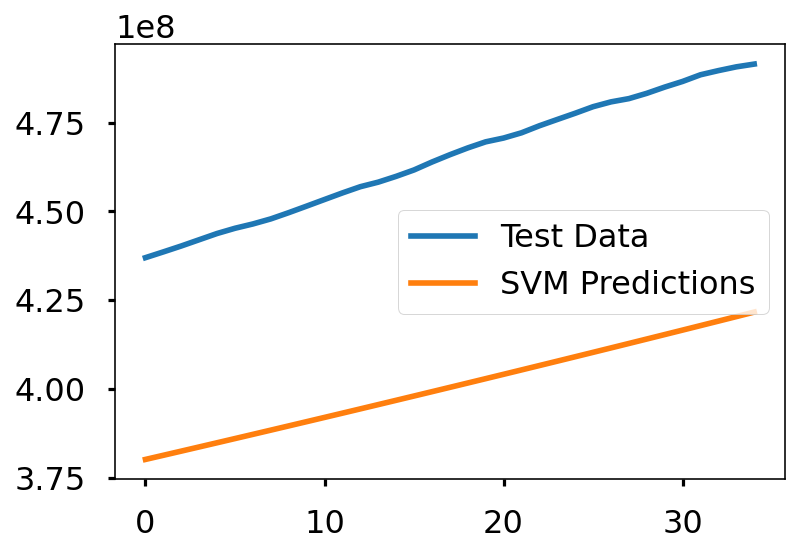

In [16]:
# check against test data 
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MAE:', mean_squared_error(svm_test_pred, y_test_confirmed))

## Wordlwide Overview

Graph of the number of confirmed cases and deaths. 

In [17]:
# flatten the data to display on a bar graph 
def flatten(arr):
    a = []
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a 

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

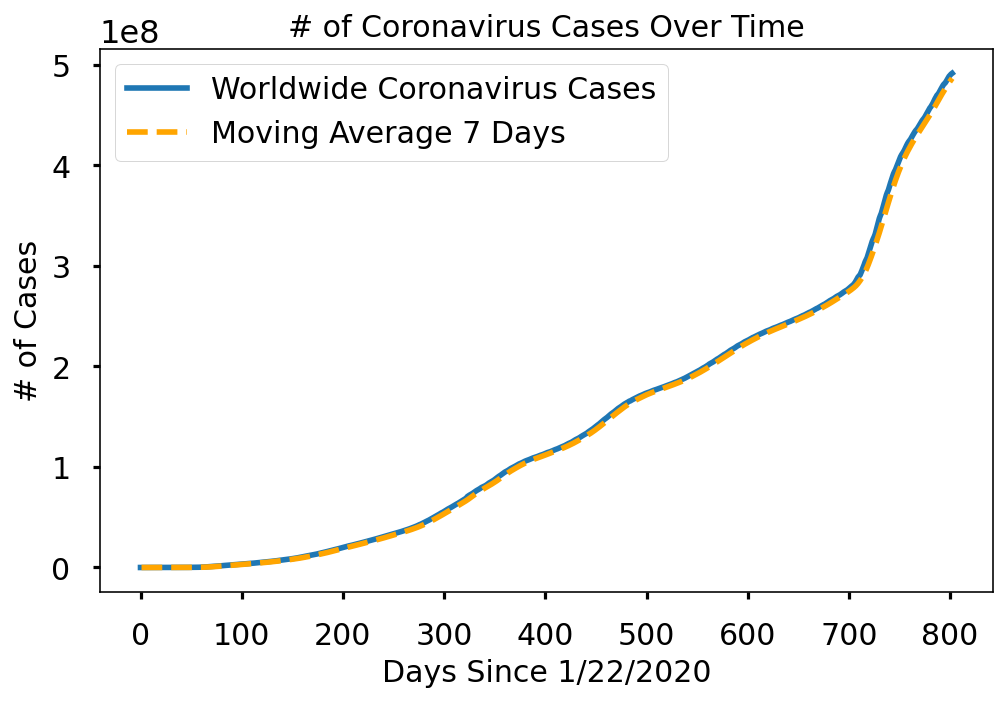

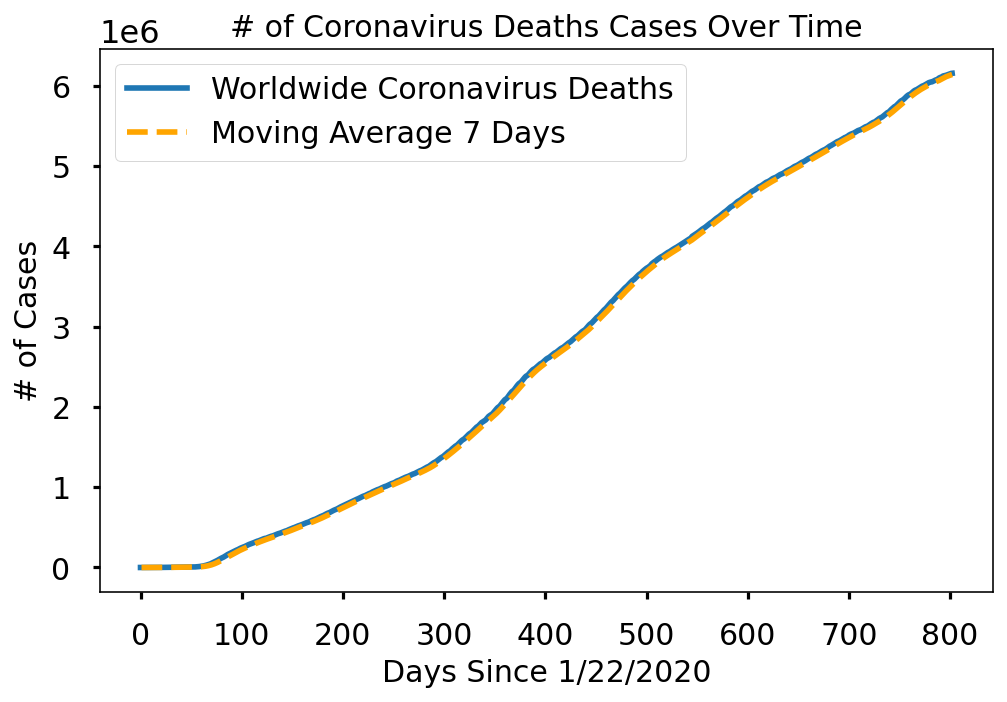

In [18]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(8, 5))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title("# of Coronavirus Cases Over Time", size = 15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(8, 5))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title("# of Coronavirus Deaths Cases Over Time", size = 15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

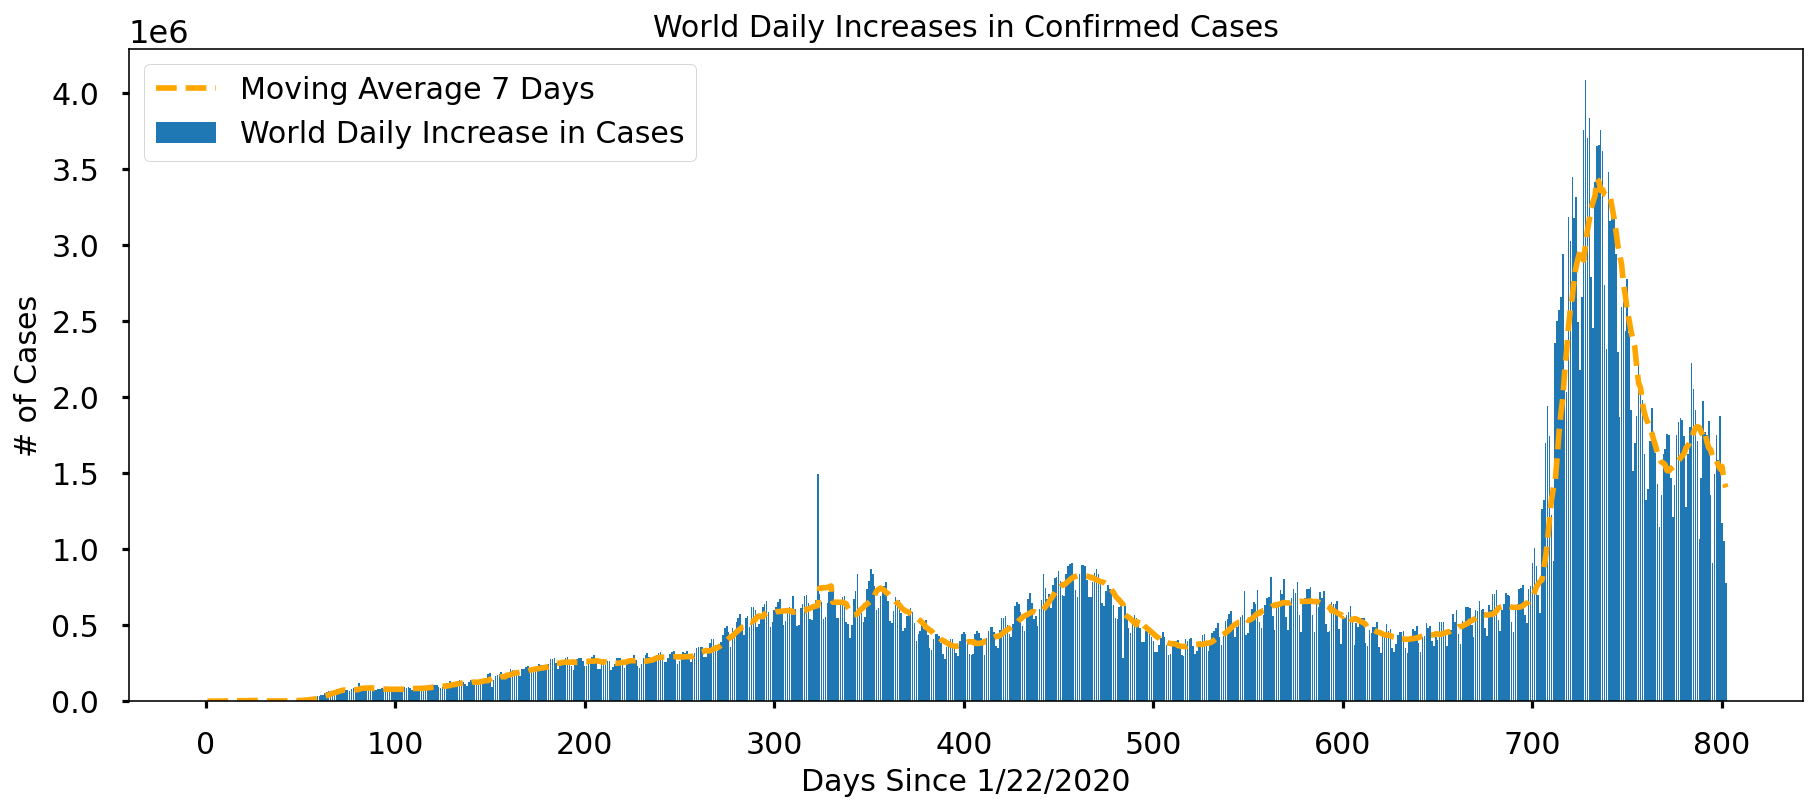

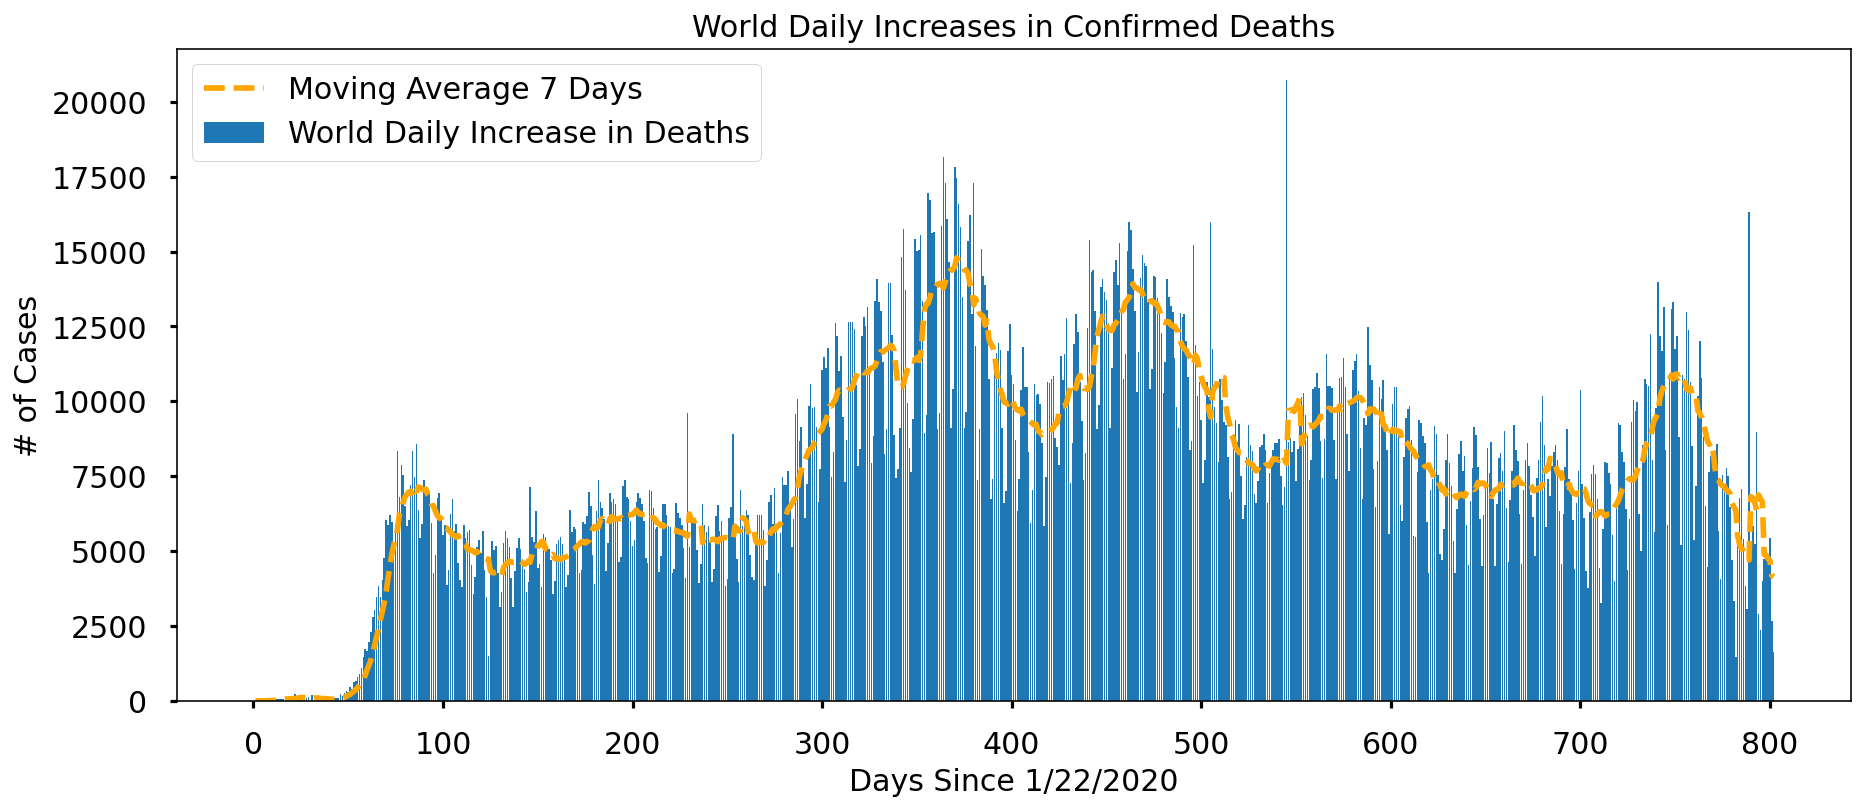

In [19]:
plt.figure(figsize=(15, 6))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, linestyle='dashed', color='orange')
plt.title("World Daily Increases in Confirmed Cases", size = 15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in Cases'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(15, 6))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, linestyle='dashed', color='orange')
plt.title("World Daily Increases in Confirmed Deaths", size = 15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in Deaths'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)

Log Plot

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

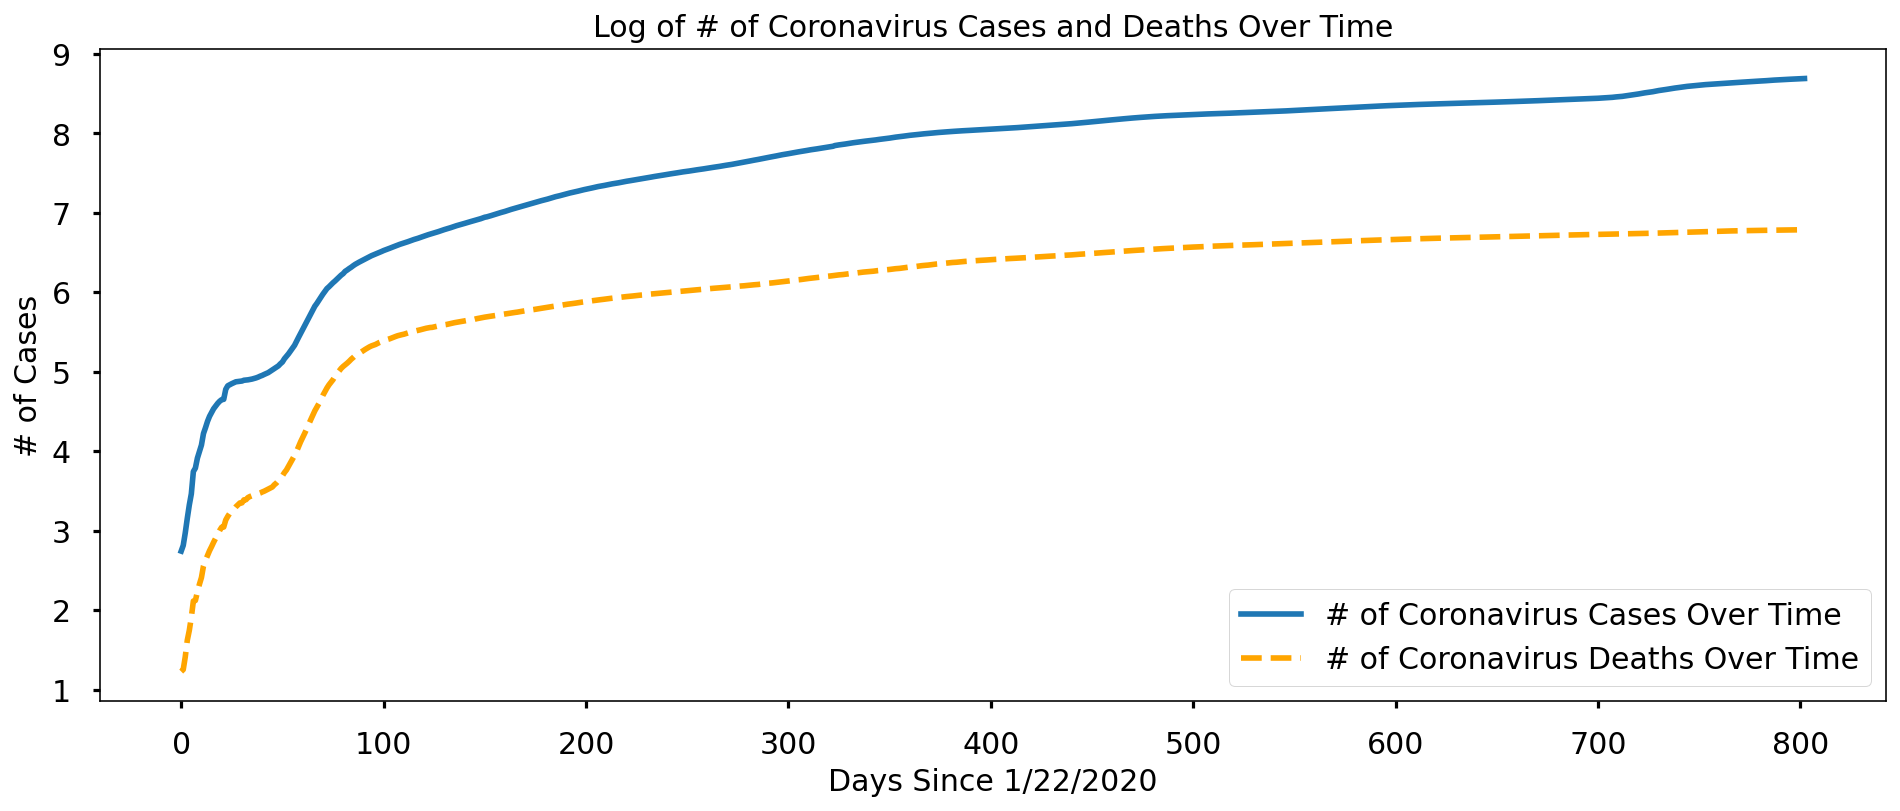

In [20]:
plt.figure(figsize=(16, 6))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.plot(adjusted_dates, np.log10(total_deaths), linestyle='dashed', color='orange')
plt.title("Log of # of Coronavirus Cases and Deaths Over Time", size = 15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['# of Coronavirus Cases Over Time', '# of Coronavirus Deaths Over Time'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)


# Country Specific Graphs 

In [21]:
def country_plot(x, confirmed, confirmed_increase, death_increase, country):
    confirmed_avg = moving_average(confirmed, window)
    confirmed_increase_avg = moving_average(confirmed_increase, window)
    death_increase_avg = moving_average(death_increase, window)
    #
    plt.figure(figsize=(8, 4))
    plt.plot(x, confirmed)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.title("{} Confirmed Cases".format(country), size = 8)
    plt.legend(["{} Confirmed Cases".format(country), 'Moving Average {} Days'.format(window)], prop={'size' : 8})
    plt.xlabel('Days Since 1/22/2020', size=8)
    plt.ylabel('# of Cases', size=8)
    plt.xticks(size=8)
    plt.yticks(size=8)
    #
    plt.figure(figsize=(8, 4))
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.bar(x, confirmed_increase)
    plt.title("{} Daily Increase in Confirmed Cases".format(country), size = 8)
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size' : 8})
    plt.xlabel('Days Since 1/22/2020', size=8)
    plt.ylabel('# of Cases', size=8)
    plt.xticks(size=8)
    plt.yticks(size=8)
    #
    plt.figure(figsize=(8, 4))
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.bar(x, death_increase)
    plt.title("{} Daily Increase in Deaths".format(country), size = 8)
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Deaths'.format(country)], prop={'size' : 8})
    plt.xlabel('Days Since 1/22/2020', size=8)
    plt.ylabel('# of Cases', size=8)
    plt.xticks(size=8)
    plt.yticks(size=8)


def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    for i in dates: 
        if country_name == 'Hong Kong':
            country_cases.append(
                confirmed_df[confirmed_df['Province/State']==country_name][i].sum()
                )
            country_deaths.append(
                deaths_df[deaths_df['Province/State']==country_name][i].sum()
                )
        else: 
            country_cases.append(
                confirmed_df[confirmed_df['Country/Region']==country_name][i].sum()
                )
            country_deaths.append(
                deaths_df[deaths_df['Country/Region']==country_name][i].sum()
                )
    return (country_cases, country_deaths)



def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    #
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    #
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)

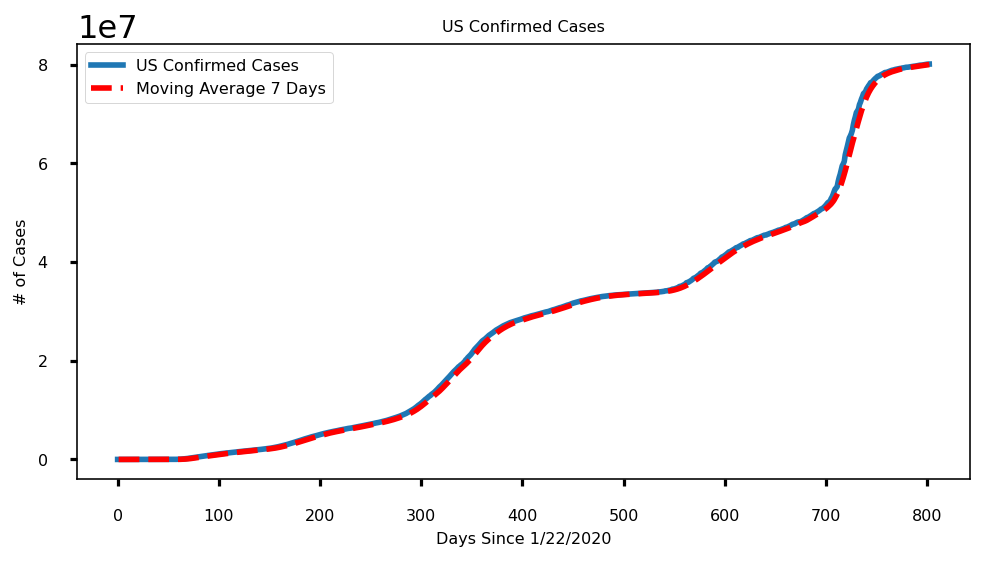

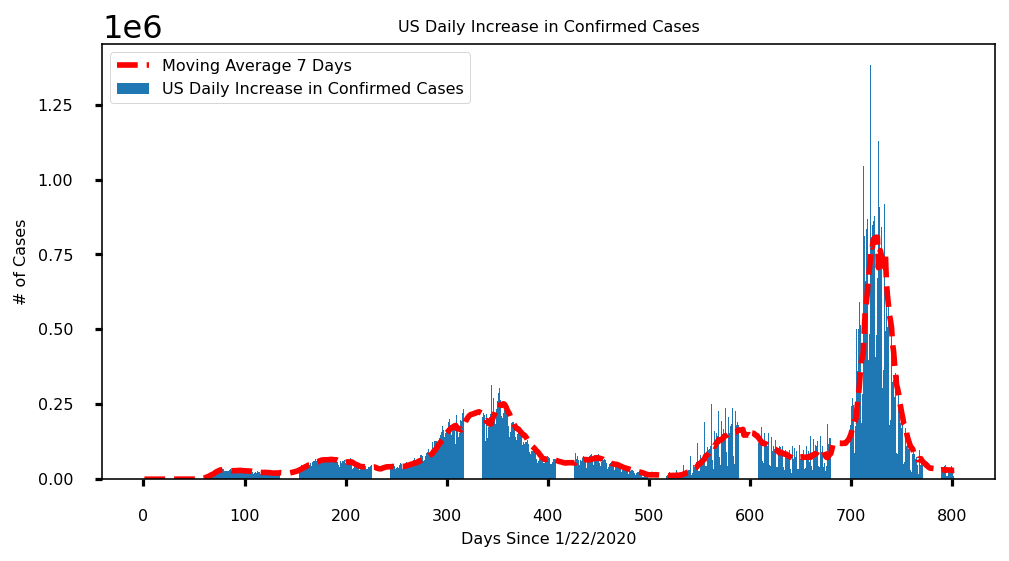

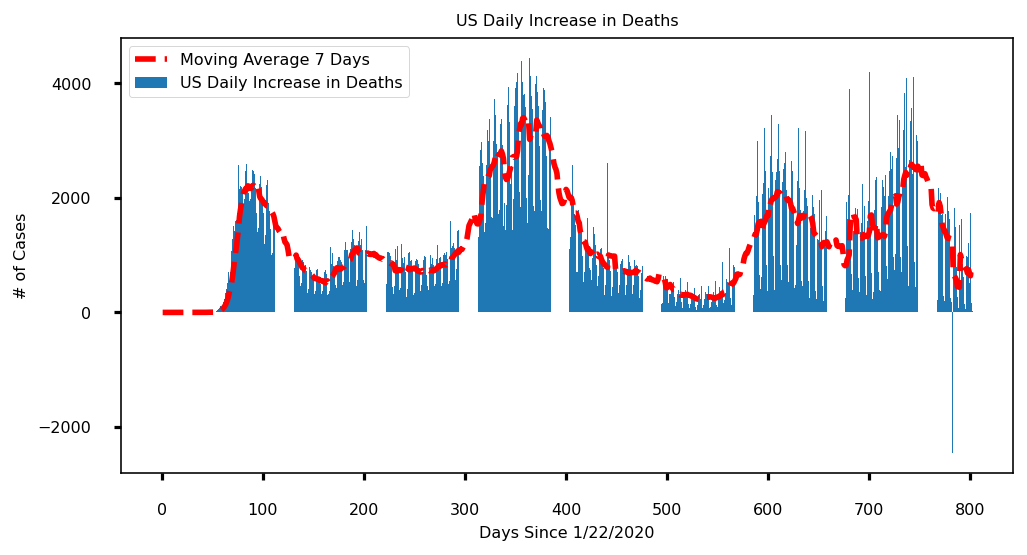

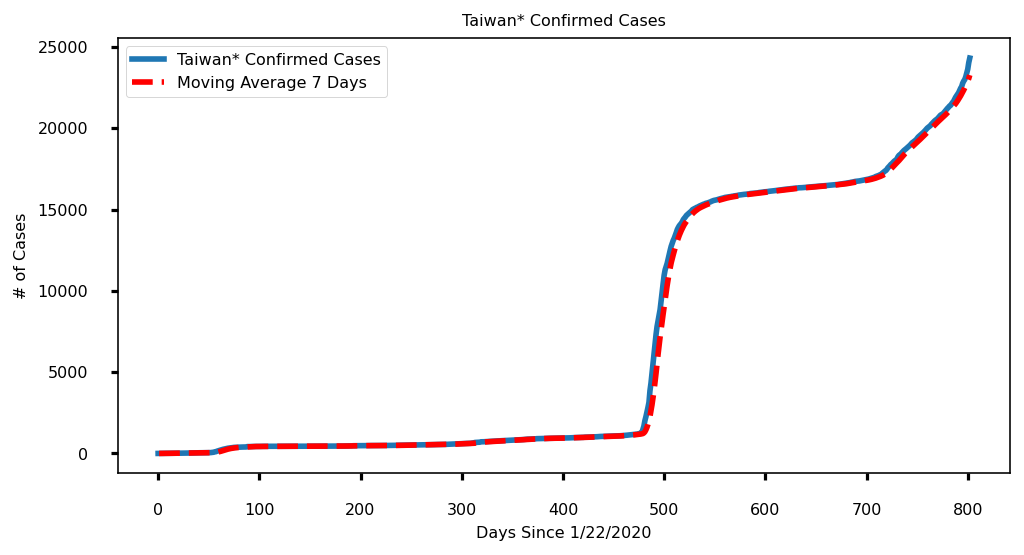

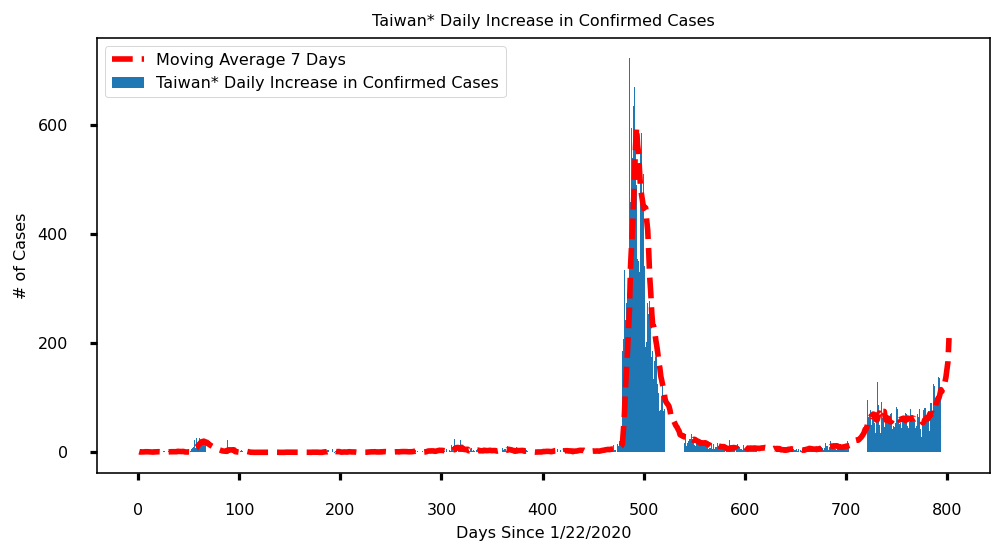

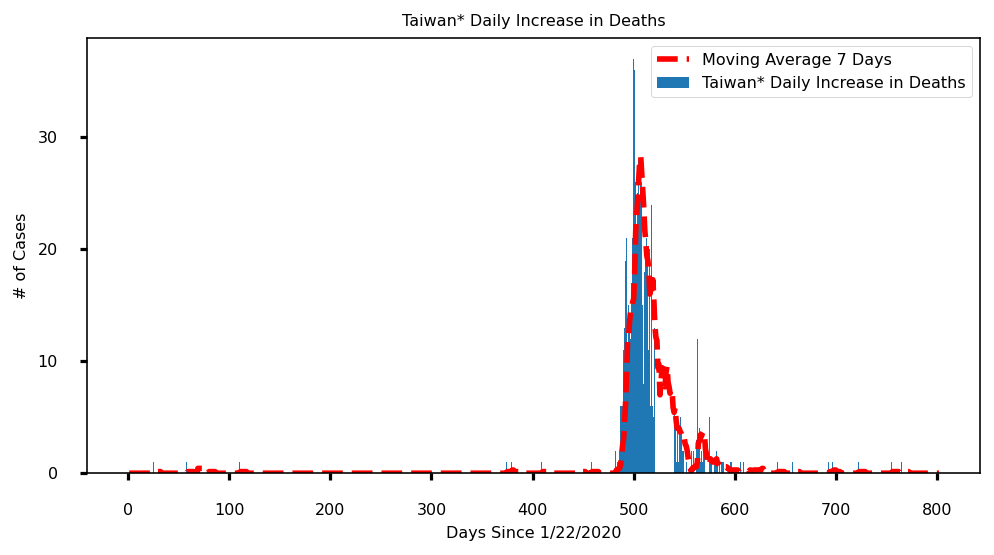

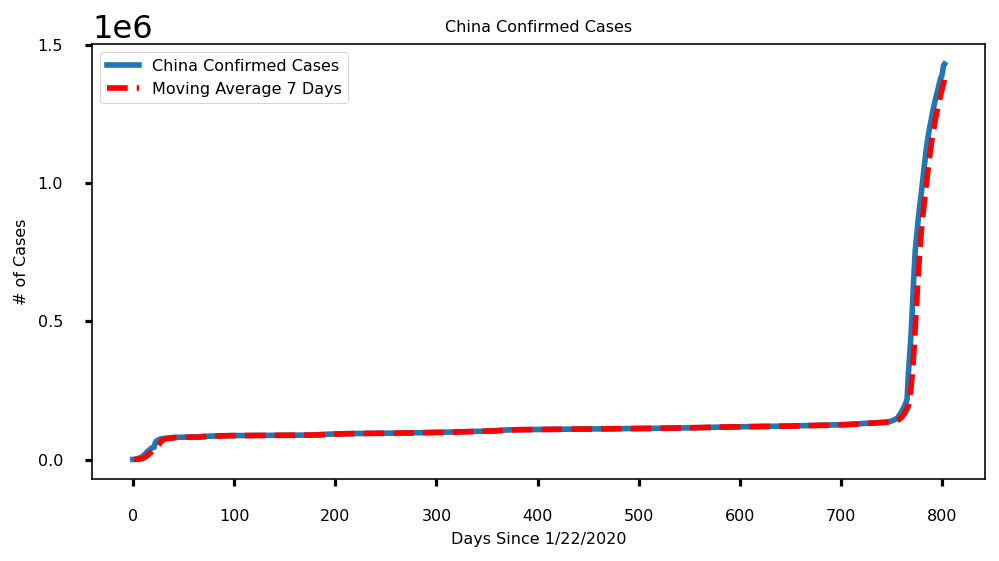

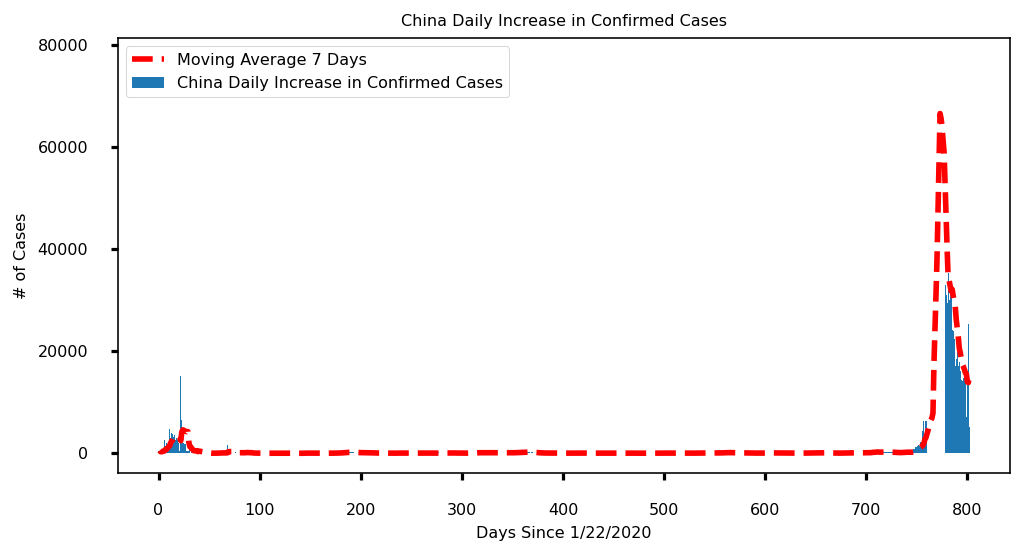

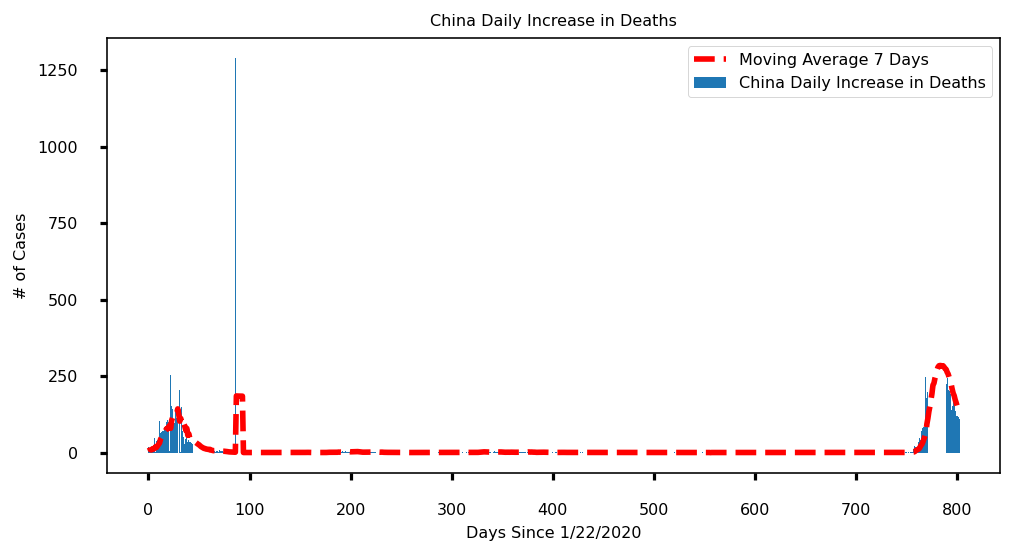

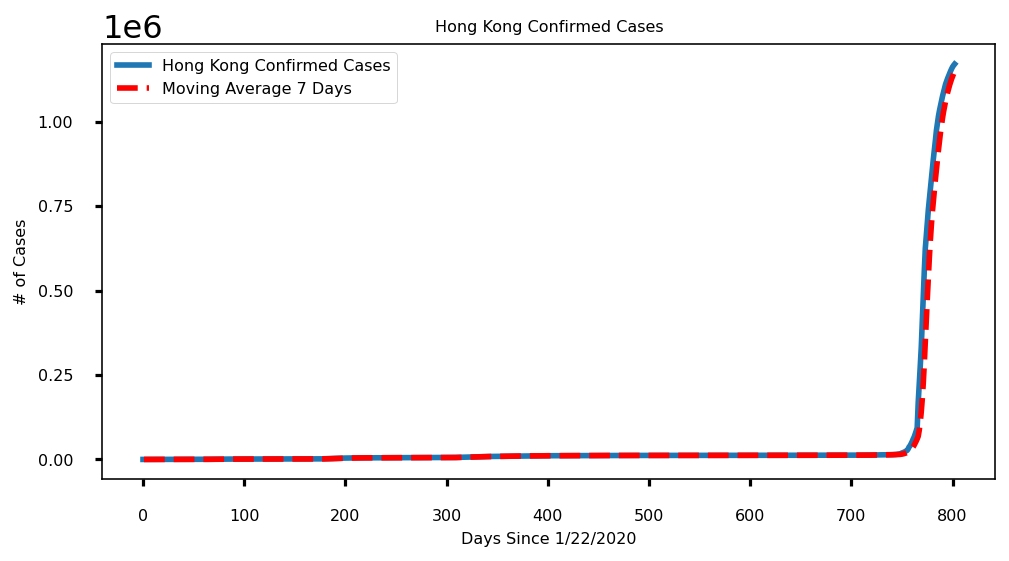

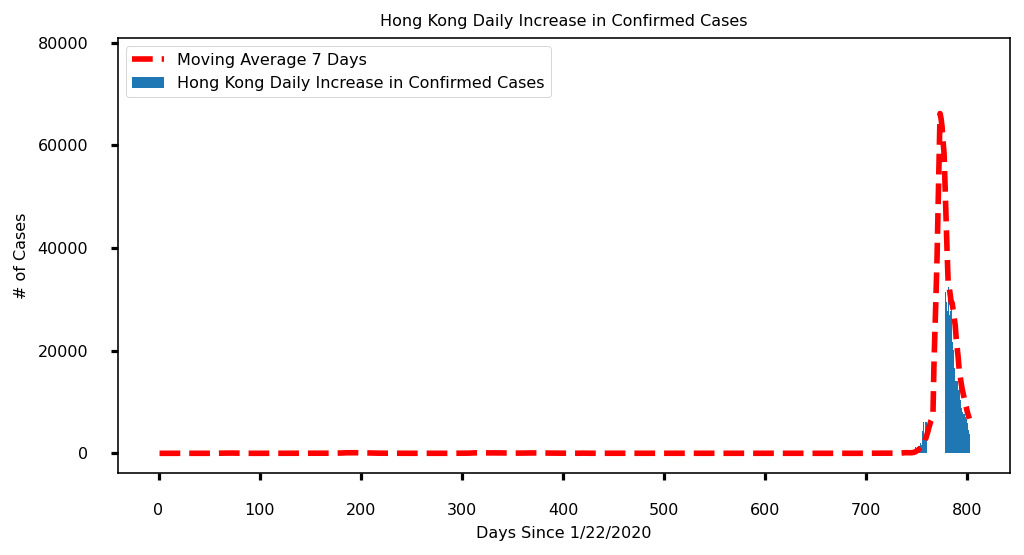

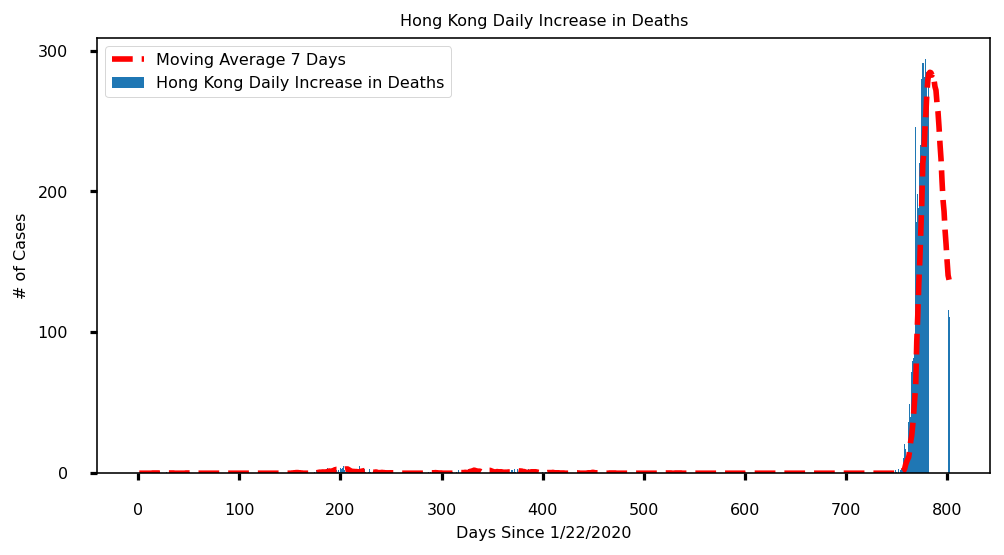

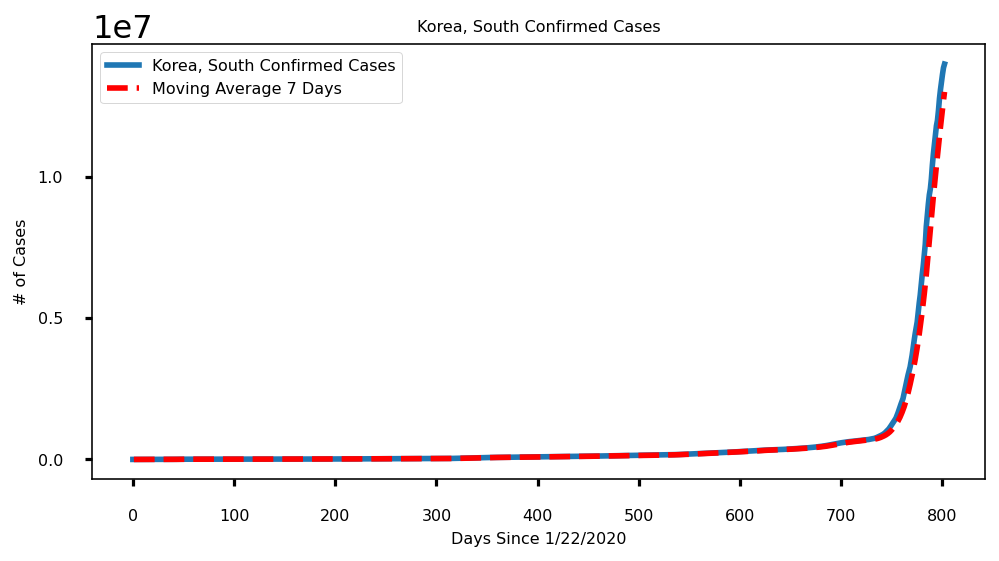

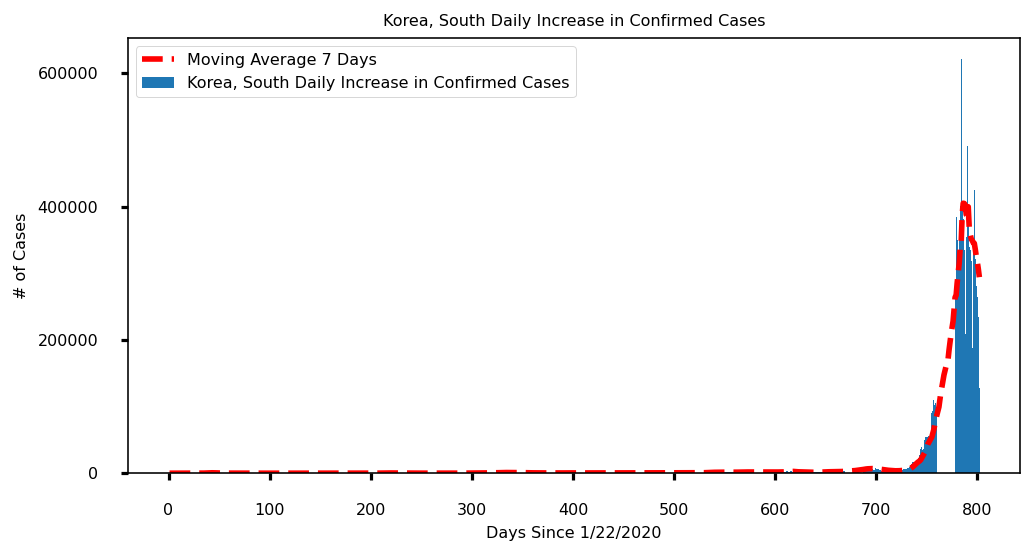

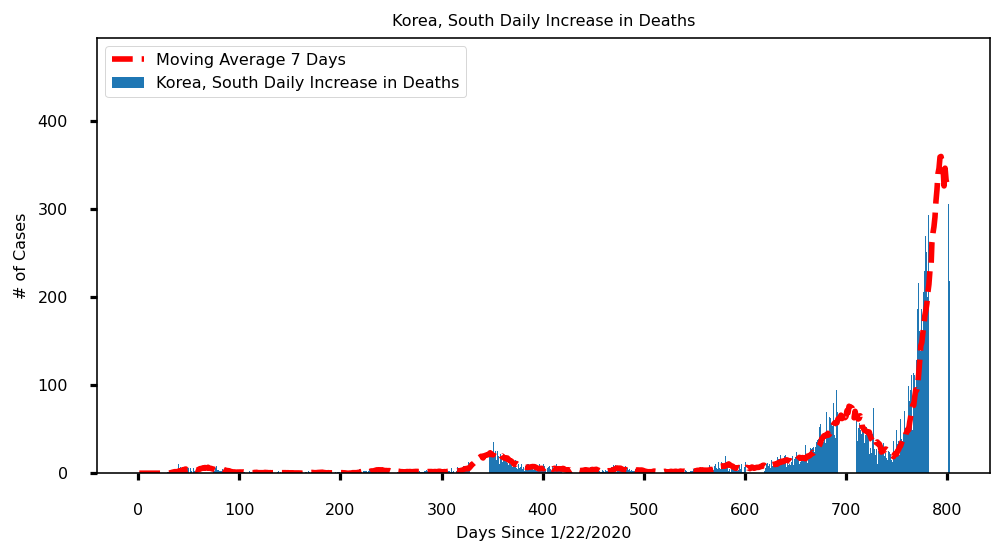

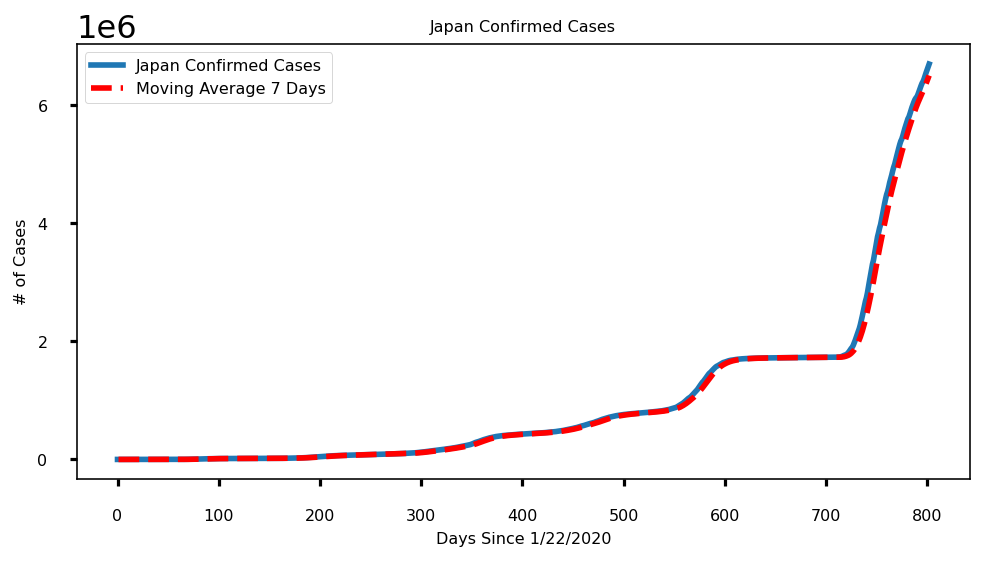

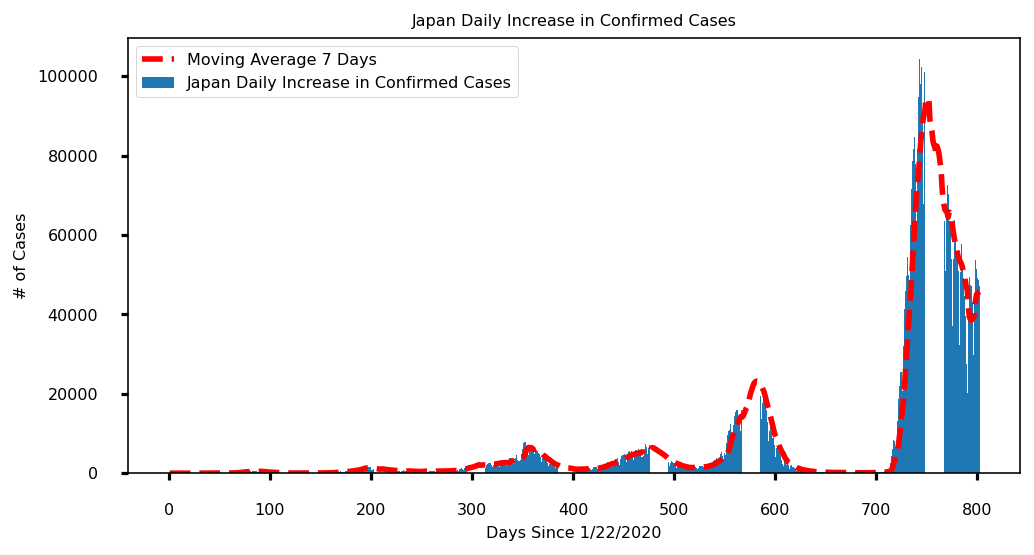

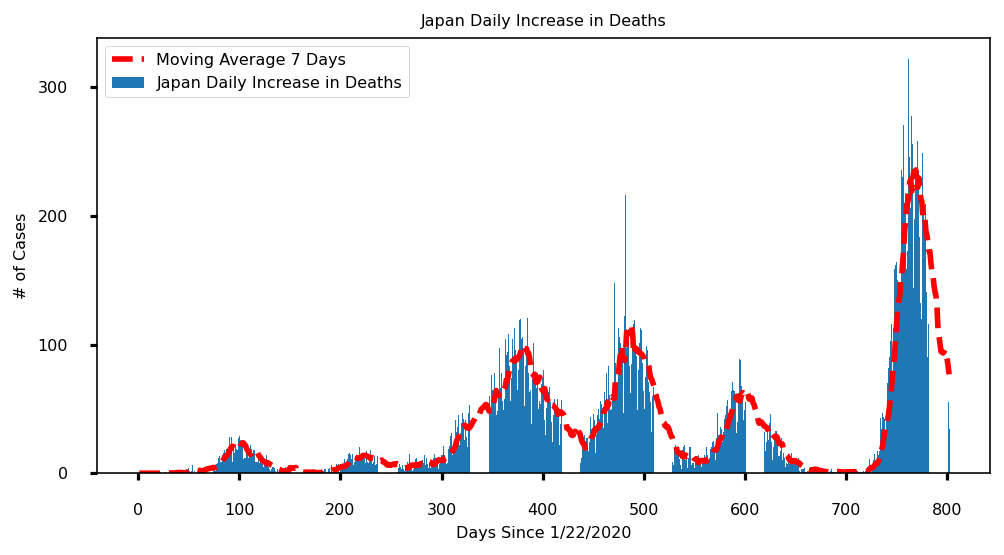

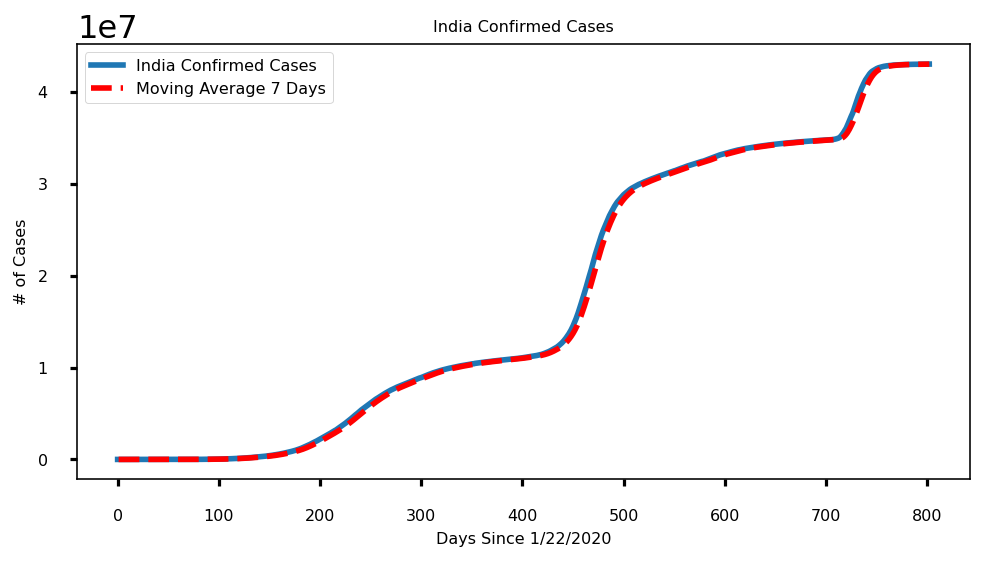

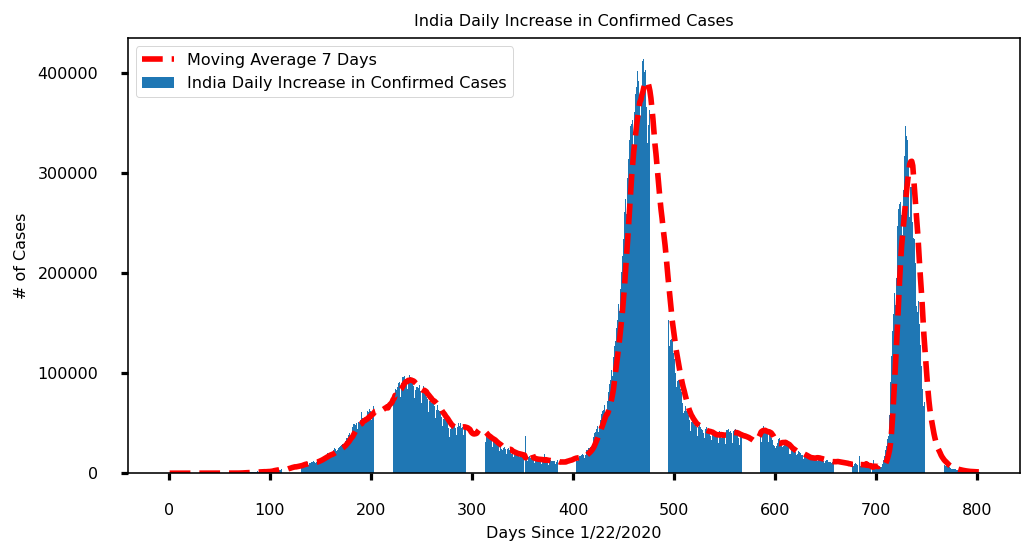

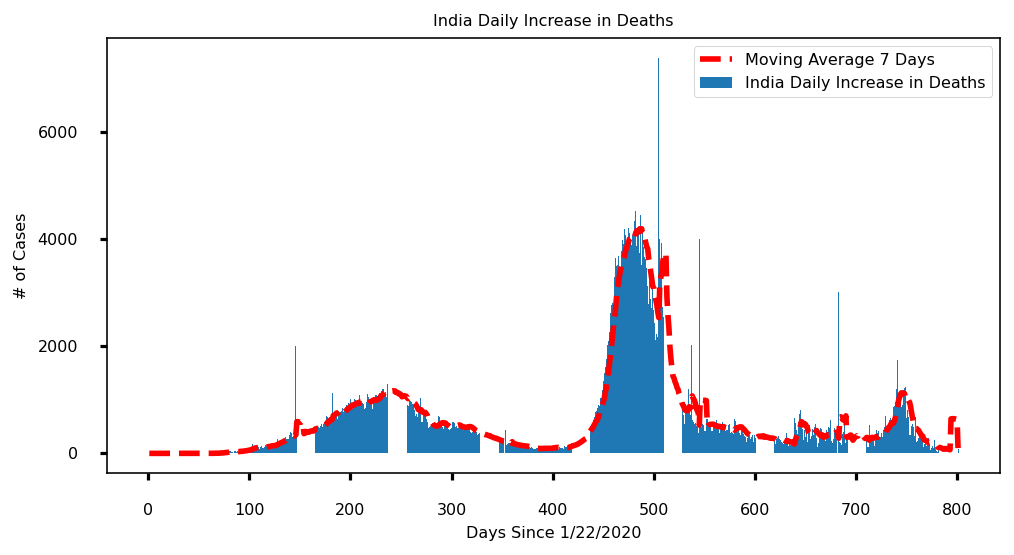

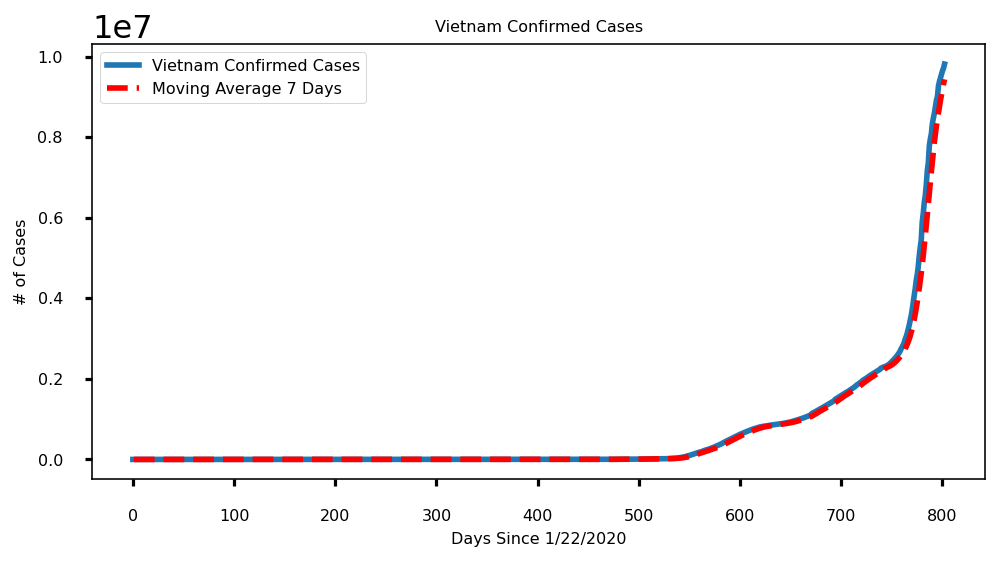

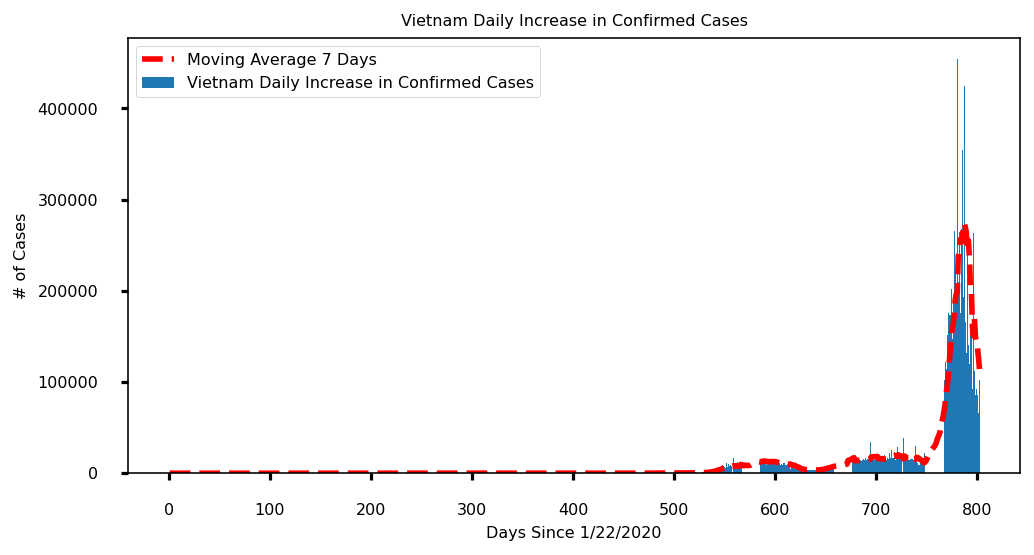

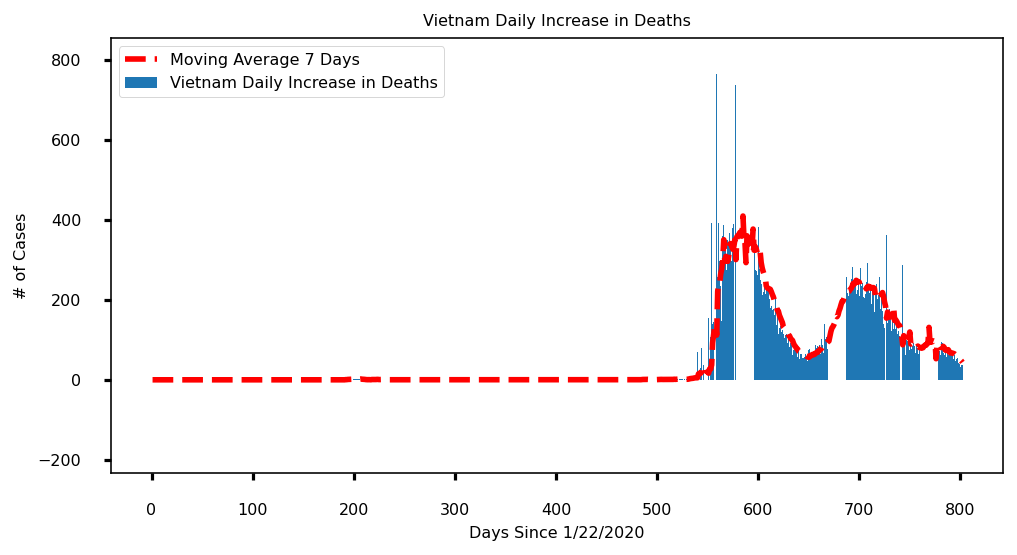

In [22]:
# countries = ['US', 'India', 'Taiwan', 'China', 'Hong Kong', 'Israel', 'Austria', 'Japan', 'Philippines', 'United Kingdom', 'France']
#countries = ['US', 'India', 'Taiwan*', 'China', 'Hong Kong,China', 'Japan', 'Philippines']
countries = ['US', 'Taiwan*', 'China', 'Hong Kong', 'Korea, South', 'Japan', 'India', 'Vietnam']
for country in countries:
    country_visualizations(country)

# Tables 

In [92]:
# unique_countries = list(latest_data['Country_Region'].unique())
unique_countries = ['US', 'Taiwan*', 'China', 'Hong Kong', 'Korea, South', 'Japan', 'India', 'Vietnam']

In [93]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_incidence_rate = []
country_mortality_rate = []

no_cases = []
for country in unique_countries:
    if country == 'Hong Kong':
        cases = latest_data[latest_data['Province_State']==country]['Confirmed'].sum()
    else: 
        cases = latest_data[latest_data['Country_Region']==country]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else: 
        no_cases.append(country)

# for i in no_cases : 
#     unique_countries.remove(i)


In [94]:
# sort 
unique_countries2 = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_countries2)):
    # print(unique_countries2[i])
    country = unique_countries2[i]
    if country == 'Hong Kong':
        country_confirmed_cases[i] = latest_data[latest_data['Province_State']==country]['Confirmed'].sum()
        country_death_cases.append(latest_data[latest_data['Province_State']==country]['Deaths'].sum())
        country_incidence_rate.append(latest_data[latest_data['Province_State']==country]['Incident_Rate'].sum())
    else: 
        country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==country]['Confirmed'].sum()
        country_death_cases.append(latest_data[latest_data['Country_Region']==country]['Deaths'].sum())
        country_incidence_rate.append(latest_data[latest_data['Country_Region']==country]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i] / country_confirmed_cases[i])

In [95]:
country_df = pd.DataFrame(
    {
        'Country Name' : unique_countries2, 
        'Number of Confirmed Cases' : [format(int(i), ',d') for i in country_confirmed_cases], 
        # 'Number of Confirmed Cases' : country_confirmed_cases, 
        'Number of Deaths' : [format(int(i), ',d') for i in country_death_cases], 
        'Incidence Rate' : country_incidence_rate, 
        'Mortality Rate' : country_mortality_rate 
    }
)
country_df.style.background_gradient(cmap='Oranges')
# country_df.style.background_gradient()  
# print(country_df)


,Country Name,Number of Confirmed Cases,Number of Deaths,Incidence Rate,Mortality Rate
0,US,"79,849,294","975,305",77321643.519027,0.012214
1,India,"43,014,687","516,672",192786.836083,0.012012
2,"Korea, South","10,822,836","13,902",21109.827321,0.001285
3,Vietnam,"8,479,751","42,075",8711.603085,0.004962
4,Japan,"6,188,977","27,373",162737.191142,0.004423
5,China,"1,269,366","11,207",14841.883074,0.008829
6,Hong Kong,"1,088,150","6,569",14514.495688,0.006037
7,Taiwan*,"22,188",853,93.161228,0.038444
